## Introduzione e contesto di business

Nel settore delle telecomunicazioni il churn dei clienti rappresenta una delle principali criticità operative e strategiche.  
Con il termine *churn* si intende l’abbandono del servizio da parte di un cliente. Nel contesto di questo progetto, il termine churn verrà utilizzato per riferirsi ai clienti che hanno lasciato il servizio.

La perdita di clienti ha un impatto diretto sui ricavi, poiché l’acquisizione di nuovi clienti è generalmente più costosa rispetto alla retention di quelli esistenti.  
L’azienda oggetto di analisi offre servizi di telefonia mobile/internet e ha osservato un aumento del tasso di churn nel tempo.

Il team marketing dispone di risorse limitate e non può attivare azioni di retention su tutta la base clienti in modo indiscriminato. Diventa quindi fondamentale comprendere la diffusione del churn e individuare eventuali pattern o segmenti di clientela maggiormente a rischio, così da supportare decisioni più mirate ed efficaci.

## Import delle librerie

In [19]:
# Manipolazione dei dati
import pandas as pd
import numpy as np

# Visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns

## Caricamento e overview del dataset

In questa sezione viene caricato il dataset e viene fornita una prima panoramica della sua struttura.  
L’obiettivo è comprendere la dimensione del dataset, il tipo di variabili disponibili e l’unità di analisi.

In [20]:
df = pd.read_csv("../data/raw/telco_customer_churn.csv")

In [21]:
df.shape

(7043, 21)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Descrizione delle variabili:

- **customerID**: identificativo univoco del cliente.
- **gender**: genere del cliente.
- **SeniorCitizen**: indica se il cliente ha un’età pari o superiore a 65 anni.
- **Partner**: presenza o meno di un partner.
- **Dependents**: presenza o meno di persone a carico.
- **tenure**: durata del rapporto del cliente con l’azienda, espressa in mesi.
- **PhoneService**: indica se il cliente ha attivo il servizio di telefonia.
- **MultipleLines**: indica se il cliente utilizza più linee telefoniche.
- **InternetService**: tipologia di servizio internet attivo.
- **OnlineSecurity**: presenza del servizio di sicurezza online.
- **OnlineBackup**: presenza del servizio di backup online.
- **DeviceProtection**: presenza del servizio di protezione del dispositivo.
- **TechSupport**: presenza del servizio di assistenza tecnica.
- **StreamingTV**: presenza del servizio di streaming TV.
- **StreamingMovies**: presenza del servizio di streaming film.
- **Contract**: tipologia di contratto sottoscritto dal cliente.
- **PaperlessBilling**: indicatore di fatturazione elettronica.
- **PaymentMethod**: metodo di pagamento utilizzato.
- **MonthlyCharges**: costo mensile del servizio, espresso in dollari(USD).
- **TotalCharges**: costo totale sostenuto dal cliente nel tempo, espresso in dollari(USD).
- **Churn**: indica se il cliente ha abbandonato (`Yes`) o meno (`No`) il servizio.

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Analisi del target: Churn

In questa sezione viene analizzata la variabile target `Churn`, che indica se un cliente ha abbandonato o meno il servizio.  
Nel dataset, il valore **`Yes`** identifica i clienti che hanno interrotto il rapporto con l’azienda, mentre il valore **`No`** rappresenta i clienti che risultano ancora attivi.

L’obiettivo di questa analisi iniziale è comprendere la diffusione del churn all’interno del dataset.  

In [24]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [25]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

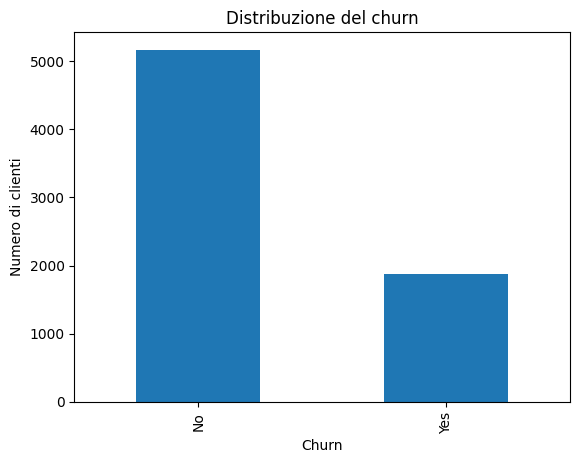

In [26]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribuzione del churn")
plt.xlabel("Churn")
plt.ylabel("Numero di clienti")
plt.show()

Dal confronto emerge una rilevanza del problema dal punto di vista del business e giustifica l’approfondimento delle caratteristiche dei clienti che abbandonano il servizio rispetto a quelli che rimangono.

### Churn per tipologia di contratto

In questa analisi viene confrontata la distribuzione del churn tra le diverse tipologie contrattuali.

In [27]:
churn_by_contract = (
    df.groupby("Contract")["Churn"]
    .value_counts(normalize=True)
    .rename("percentage")
    .reset_index()
)

churn_by_contract

,Contract,Churn,percentage
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887305
3,One year,Yes,0.112695
4,Two year,No,0.971681
5,Two year,Yes,0.028319


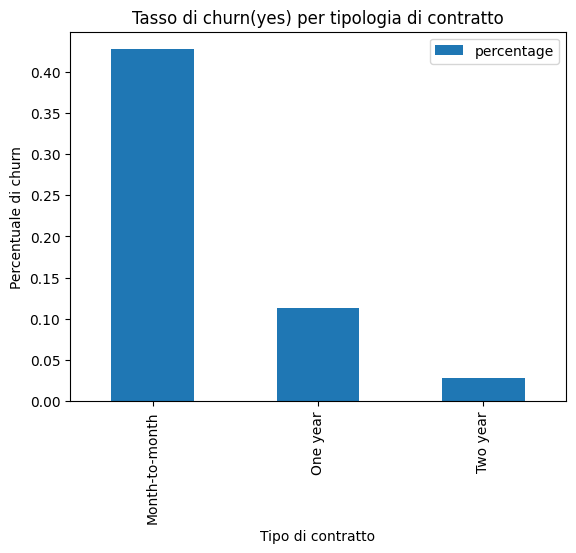

In [28]:
churn_by_contract[churn_by_contract["Churn"] == "Yes"].plot(
    x="Contract",
    y="percentage",
    kind="bar"
)

plt.title("Tasso di churn(yes) per tipologia di contratto")
plt.ylabel("Percentuale di churn")
plt.xlabel("Tipo di contratto")
plt.show()

 I contratti a breve termine mostrano una maggiore propensione all’abbandono rispetto ai contratti di durata più lunga, suggerendo che la stabilità contrattuale svolge un ruolo rilevante nella retention dei clienti.

### Churn e durata del rapporto con il cliente

La variabile `tenure` rappresenta la durata del rapporto tra il cliente e l’azienda.  
Analizzare il churn in funzione della tenure consente di comprendere se l’abbandono è più frequente nelle fasi iniziali o avanzate del contratto col cliente.

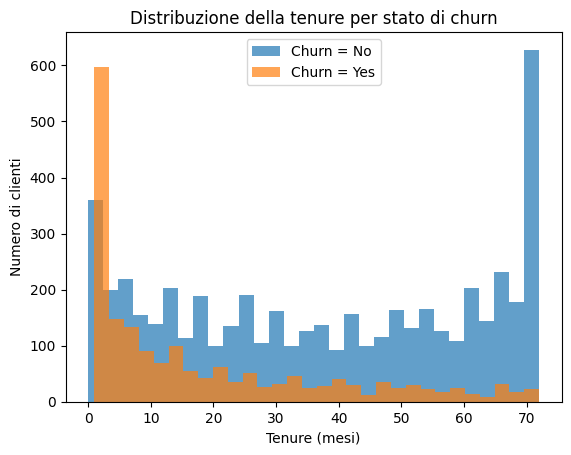

In [29]:
plt.hist(df[df["Churn"] == "No"]["tenure"], bins=30, alpha=0.7, label="Churn = No")
plt.hist(df[df["Churn"] == "Yes"]["tenure"], bins=30, alpha=0.7, label="Churn = Yes")

plt.xlabel("Tenure (mesi)")
plt.ylabel("Numero di clienti")
plt.title("Distribuzione della tenure per stato di churn")
plt.legend()
plt.show()

IL grafico mostra che il churn tende a concentrarsi maggiormente tra i clienti con una tenure più bassa.  
Questo suggerisce che le fasi iniziali del rapporto rappresentano un momento critico per la retention e che interventi mirati nei primi mesi potrebbero ridurre significativamente l’abbandono.

### Churn e costo mensile del servizio

Il costo mensile rappresenta un possibile fattore di insoddisfazione o di percezione negativa del valore del servizio.  
In questa analisi viene confrontata la distribuzione dei costi mensili tra clienti che hanno abbandonato e clienti attivi.

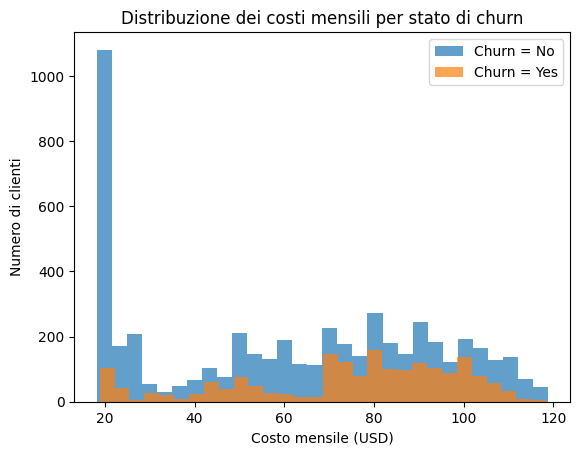

In [30]:
plt.hist(df[df["Churn"] == "No"]["MonthlyCharges"], bins=30, alpha=0.7, label="Churn = No")
plt.hist(df[df["Churn"] == "Yes"]["MonthlyCharges"], bins=30, alpha=0.7, label="Churn = Yes")

plt.xlabel("Costo mensile (USD)")
plt.ylabel("Numero di clienti")
plt.title("Distribuzione dei costi mensili per stato di churn")
plt.legend()
plt.show()

L’analisi evidenzia una differenza nella distribuzione dei costi mensili tra clienti che abbandonano e clienti che rimangono.  
Una maggiore concentrazione di churn a livelli di spesa più elevati può indicare una percezione di scarso valore del servizio rispetto al costo sostenuto.

### Churn e supporto tecnico

Il servizio di assistenza tecnica può rappresentare un elemento chiave nella percezione di qualità del servizio, soprattutto per clienti con piani più complessi o costi mensili elevati.

In questa sezione viene analizzata la relazione tra la presenza del servizio di supporto tecnico e il churn dei clienti.

In [31]:
churn_by_tech = (
    df.groupby("TechSupport")["Churn"]
    .value_counts(normalize=True)
    .rename("percentage")
    .reset_index()
)

churn_by_tech

,TechSupport,Churn,percentage
0,No,No,0.583645
1,No,Yes,0.416355
2,No internet service,No,0.925950
3,No internet service,Yes,0.074050
4,Yes,No,0.848337
5,Yes,Yes,0.151663


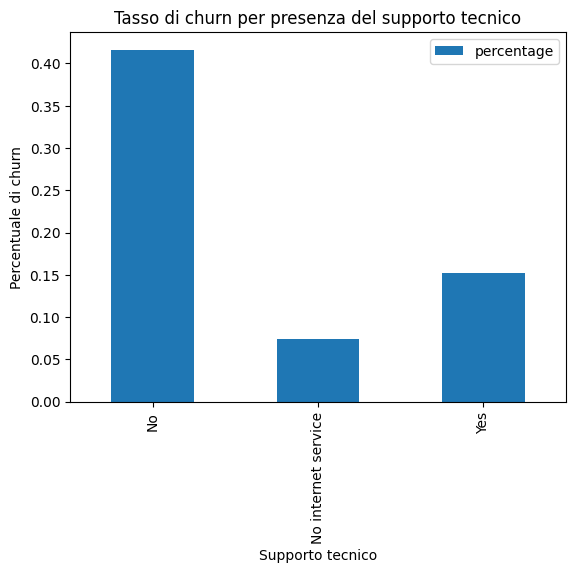

In [32]:
churn_by_tech[churn_by_tech["Churn"] == "Yes"].plot(
    x="TechSupport",
    y="percentage",
    kind="bar"
)

plt.title("Tasso di churn per presenza del supporto tecnico")
plt.xlabel("Supporto tecnico")
plt.ylabel("Percentuale di churn")
plt.show()

Dall’analisi emerge che i clienti privi del servizio di supporto tecnico presentano un tasso di churn più elevato rispetto a quelli che dispongono di assistenza.

Questo suggerisce che la presenza di supporto tecnico possa svolgere un ruolo protettivo nei confronti dell’abbandono, contribuendo a migliorare la percezione del valore del servizio.